In [42]:
import os
import sys

CURR_DIR = os.path.dirname(os.path.abspath("__file__"))

In [43]:
CURR_DIR

'/home/hosodashunta/OpenEndedCodebook/experiments/Chapter2/out/maze_neat'

In [44]:
import matplotlib.pyplot as plt
import scienceplots
import pandas as pd
import numpy as np

In [45]:
def get_global_bests(local_bests: list) -> list:
    """グローバルベストを取得

    Args:
        local_bests (list): ローカルベストのリスト

    Returns:
        list: グローバルベストのリスト
    """
    global_bests = [local_bests[0]]
    for local_i in local_bests[1:]:
        if local_i < global_bests[-1]:
            global_bests.append(local_i)
        else:
            global_bests.append(global_bests[-1])
    return global_bests

In [58]:
r_dirs = ["no_ts", "normalized_ts", "fit/ts"]
colors = ["y", "b", "r"]
labels = ["no_ts", "normalized", "fit/ts"]

In [59]:
for i in range(len(r_dirs)):

    print(r_dirs[i], colors[i], labels[i])

no_ts y no_ts
normalized_ts b normalized
fit/ts r fit/ts


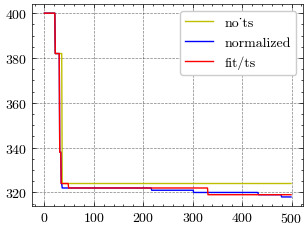

In [61]:
plt.style.use(['science', 'grid', 'no-latex'])

fig, ax = plt.subplots()

for i in range(len(r_dirs)):
    read_path = os.path.join(CURR_DIR, r_dirs[i])
    
    hist_fit_file = os.path.join(read_path, "history_fitness.csv")
    hist_pop_file = os.path.join(read_path, "history_pop.csv")
    df_fit = pd.read_csv(hist_fit_file)
    df_pop = pd.read_csv(hist_pop_file)
    
    global_best_hist = get_global_bests(df_fit["timestep"].values)
    

    ax.plot(global_best_hist, label=labels[i], color=colors[i])
    

plt.legend()
plt.savefig("globalbests_timestep.png")
plt.show()
